In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv("creditcard.csv")

In [56]:
print(data.head())
print(data.columns)
print(data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Header Column Class represents the state of transaction (1 = fraudulent, 0 = valid)

Lets take a 30% random sample to reduce compilation and fitting rates

In [57]:
data = data.sample(frac = 0.30, random_state = 1)
print(data.shape)

(85442, 31)


A correlation matrix might show us some features to focus on and perhaps increase accuracy and improve speed of classification

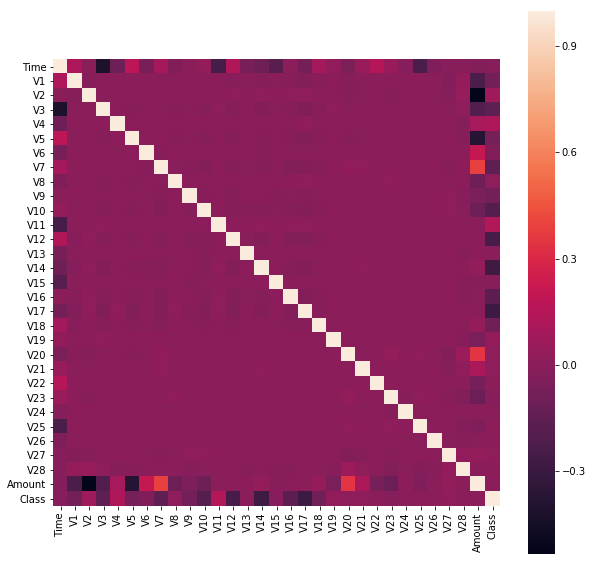

In [58]:
correlation_matrix = data.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,square = True)
plt.show()

This shows that columns V3,V7,V10,V12,V14,V17 are not that correlated with the state of the transaction

In [59]:
data = data.drop(['V10','V12','V14','V17'],1)

The average for the Class Column head is 0.001727 meaning that a very low amount of transactions in this dataset are considered fraudulent. This could mean using an outlier focused classifier or model would be effective.

In [60]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

percent_fraud = len(fraud)/len(valid)
print(percent_fraud)

0.001582519605659559


In [61]:
columns = data.columns.tolist()

target = "Class"

columns = [c for c in columns if c not in [target]]
print(columns)

X = data[columns]
Y = data[target]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .5)
print(Y_train.shape,Y_test.shape)

print(X.shape,Y.shape)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(42721,) (42721,)
(85442, 26) (85442,)


Preprocessing Complete!

In [62]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.neighbors import KNeighborsClassifier

K Nearest Neighbors Classifier

In [63]:
clf = KNeighborsClassifier()
foo = clf.fit(X_train,Y_train) 
y_pred = clf.predict(X_test)

In [64]:
print(accuracy_score(y_pred,Y_test))

0.9986423538774841


Lets also try an Isolation Forest Classifier as this could be effective when dealing with outlier cases

In [65]:
import warnings
warnings.filterwarnings("ignore")

clf = IsolationForest(contamination = percent_fraud)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred==1] = 0
y_pred[y_pred==-1] = 1

In [66]:
print(accuracy_score(y_pred,Y_test))

0.9975656000561784
